In [2]:
import sqlite3
import requests
import seaborn as sns
#cur = conn.cursor()
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from src.make_db import create_movies_db

In [45]:
create_movies_db()

imdb_title_principals table created successfully....
imdb_name_basic table created successfully....
imdb_title_crew table created successfully....
imdb_title_ratings table created successfully....
imdb_title_basics table created successfully....
imdb_title_akas table created successfully....
tn_movie_budgets table created successfully....
tmdb_movies table created successfully....
bom_movie_gross table created successfully....
rotten_tomatoes_critic_reviews table created successfully....
rotten_tomatoes_movies table created successfully....
Inserting data into the imdb_title_crew table....
Inserting data into the tmdb_movies table....
Inserting data into the imdb_title_akas table....
Inserting data into the imdb_title_ratings table....
Inserting data into the imdb_name_basics table....
Inserting data into the rotten_tomatoes_movies table....
Inserting data into the rotten_tomatoes_critic_reviews table....
Inserting data into the imdb_title_basics table....
Inserting data into the tn_mo

In [46]:
conn = sqlite3.connect('data\movies.db')
movie_title = pd.read_sql ('''SELECT genres , domestic_gross
                              FROM imdb_title_basics
                              JOIN tn_movie_budgets
                              ON primary_title=movie
                              
                              
                              ''',conn)

movie_title

,genres,domestic_gross
0,"Action,Animation,Comedy",$0
1,"Action,Adventure,Fantasy","$70,433,227"
2,None,"$1,109,808"
3,"Adventure,Drama,Romance","$720,828"
4,"Adventure,Comedy,Drama","$58,236,838"
...,...,...
3810,None,"$6,916,869"
3811,Drama,"$8,224,288"
3812,Documentary,$0
3813,Comedy,"$1,017,107"


In [4]:
movie_title['domestic_gross'] = movie_title['domestic_gross'].str.replace('$', '').str.replace(',','')
movie_title['domestic_gross'] = movie_title['domestic_gross'].astype(int)

In [5]:
movie_title = movie_title.groupby('genres',as_index=False).mean()
pd.set_option('display.float_format', '{:.2f}'.format)

Text(0.5, 0, 'Stock')

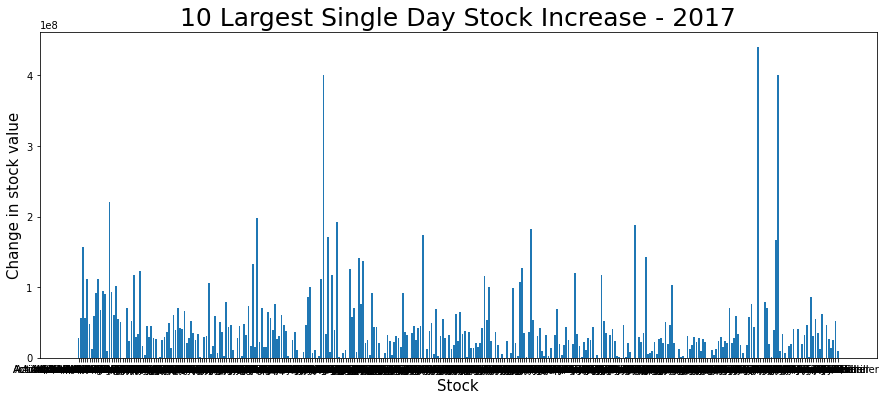

In [7]:
fig, ax = plt.subplots(figsize=(15,6))

xlabels = movie_title.genres
ax.bar(xlabels, movie_title.domestic_gross)
ax.set_title('10 Largest Single Day Stock Increase - 2017', fontsize=25)
ax.set_ylabel('Change in stock value', fontsize=15)
ax.set_xlabel('Stock', fontsize=15)


In [47]:
ratingg = pd.read_sql('''SELECT * FROM tmdb_movies''', conn)
ratingg

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [30]:
ratingg.drop_duplicates(subset ="original_title",
                     keep = False, inplace = True)
ratingg

,release_date,popularity,original_title
0,2010-11-19,33.533,Harry Potter and the Deathly Hallows: Part 1
1,2010-03-26,28.734,How to Train Your Dragon
2,2010-05-07,28.515,Iron Man 2
4,2010-07-16,27.920,Inception
5,2010-02-11,26.691,Percy Jackson & the Olympians: The Lightning T...
...,...,...,...
26512,2018-10-13,0.600,Laboratory Conditions
26513,2018-05-01,0.600,_EXHIBIT_84xxx_
26514,2018-10-01,0.600,The Last One
26515,2018-06-22,0.600,Trailer Made


In [48]:
ratingg.sort_values('popularity', ascending=False)
ratingg

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
